In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd drive/MyDrive/Colab\ Notebooks/scripts/

/content/drive/MyDrive/Colab Notebooks/scripts


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os

In [4]:
from feature_selection import forwardFeatureSelection

from NonLinCFA import NonLinCFA

from aux_NonLinCFA import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,aggregate_unfolded_data_onlyTrain,FS_with_linearWrapper,compare_methods, compute_r2, aggregate_data_withoutUnfolding

In [5]:
cd ..

/content/drive/MyDrive/Colab Notebooks


### Original VHI vs prediction with and without moving average

In [ ]:
### targets
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
path_targets = "./csv/"
targets_df_train = pd.DataFrame()
targets_df_val = pd.DataFrame()
targets_df_test = pd.DataFrame()
targets_df_trainVal = pd.DataFrame()

for basin in basins:
    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', 
                                                                                     max_test='2020-01-01', path=path_targets+basin+'.csv', window_size = 1)
    targets_df_train[basin] = target_df_train.mean_std
    targets_df_val[basin] = target_df_val.mean_std
    targets_df_test[basin] = target_df_test.mean_std
    targets_df_trainVal[basin] = target_df_trainVal.mean_std

In [ ]:
lin_regr = LinearRegression()
basin = "Oglio_Iseo"

In [ ]:
def get_features (path_features, basin, train_name, val_name, test_name):
  features_train = pd.read_csv(path_features + basin + train_name)
  features_valid = pd.read_csv(path_features + basin + val_name)
  features_test = pd.read_csv(path_features + basin + test_name)
  
  features_train_validation = pd.concat([features_train, features_valid])
  return features_train.values, features_valid.values, features_train_validation.values, features_test.values

In [ ]:
path_features = './NonLinCFA/temp_prec/'
# CMI_best_5
X_train_CMI5, X_validation_CMI5, X_train_validation_CMI5, X_test_CMI5 = get_features(
    path_features, basin, '_nonLinCFA_best5_CMI_train.csv', '_nonLinCFA_best5_CMI_val.csv', '_nonLinCFA_best5_CMI_test.csv')

# CMI best 5
lin_regr.fit(X_train_validation_CMI5, targets_df_trainVal[basin])
print("Train R2 linear regression CMI best 5: ", round(lin_regr.score(X_train_validation_CMI5, targets_df_trainVal[basin]),3))
print("Test R2 linear regression CMI best 5: ", round(lin_regr.score(X_test_CMI5, targets_df_test[basin]),3))

Train R2 linear regression CMI best 5:  0.175
Test R2 linear regression CMI best 5:  0.265


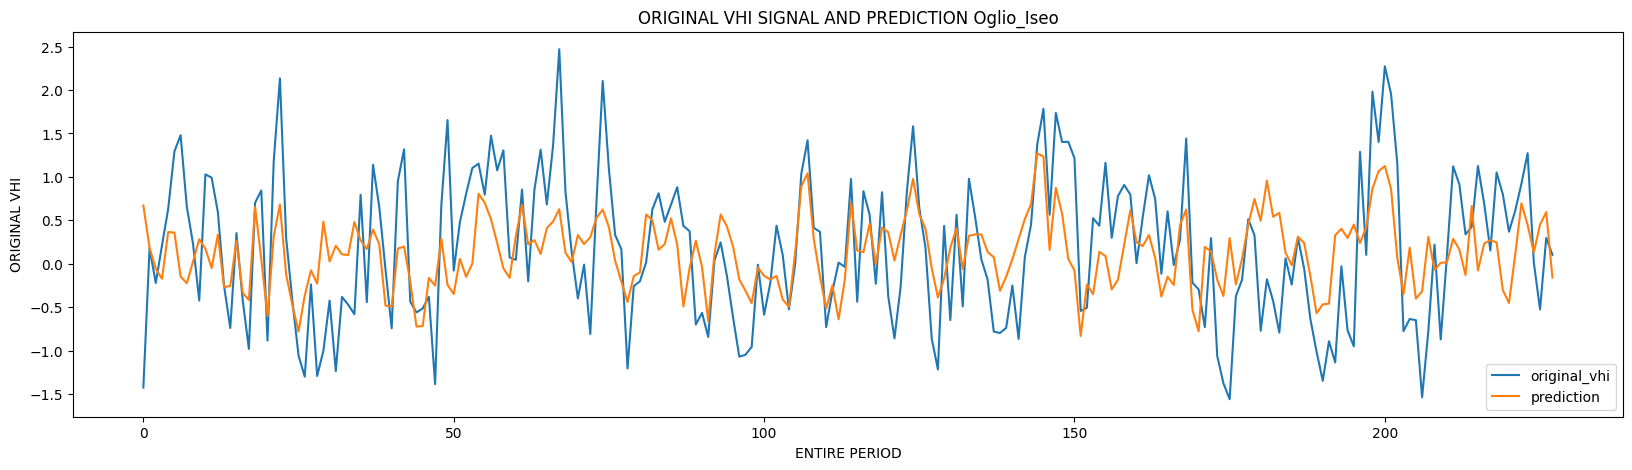

In [ ]:
target = targets_df_test[basin].values

plt.plot(target, label = "original_vhi")
plt.plot(lin_regr.predict(X_test_CMI5), label = "prediction")

plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel('ENTIRE PERIOD')
plt.ylabel('ORIGINAL VHI')
plt.title("ORIGINAL VHI SIGNAL AND PREDICTION " + basin)

plt.legend(loc="lower right")

In [ ]:
for basin in basins:
    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', 
                                                                                     max_test='2020-01-01', path=path_targets+basin+'.csv', window_size = 4)
    targets_df_train[basin] = target_df_train.mean_std
    targets_df_val[basin] = target_df_val.mean_std
    targets_df_test[basin] = target_df_test.mean_std
    targets_df_trainVal[basin] = target_df_trainVal.mean_std

In [ ]:
path_features = './NonLinCFA/temp_prec_moving_avg_4/'
# CMI_best_5
X_train_CMI5, X_validation_CMI5, X_train_validation_CMI5, X_test_CMI5 = get_features(
    path_features, basin, '_nonLinCFA_best5_CMI_train.csv', '_nonLinCFA_best5_CMI_val.csv', '_nonLinCFA_best5_CMI_test.csv')

# CMI best 5
lin_regr.fit(X_train_validation_CMI5, targets_df_trainVal[basin])
print("Train R2 linear regression CMI best 5: ", round(lin_regr.score(X_train_validation_CMI5, targets_df_trainVal[basin]),3))
print("Test R2 linear regression CMI best 5: ", round(lin_regr.score(X_test_CMI5, targets_df_test[basin]),3))

Train R2 linear regression CMI best 5:  0.214
Test R2 linear regression CMI best 5:  0.178


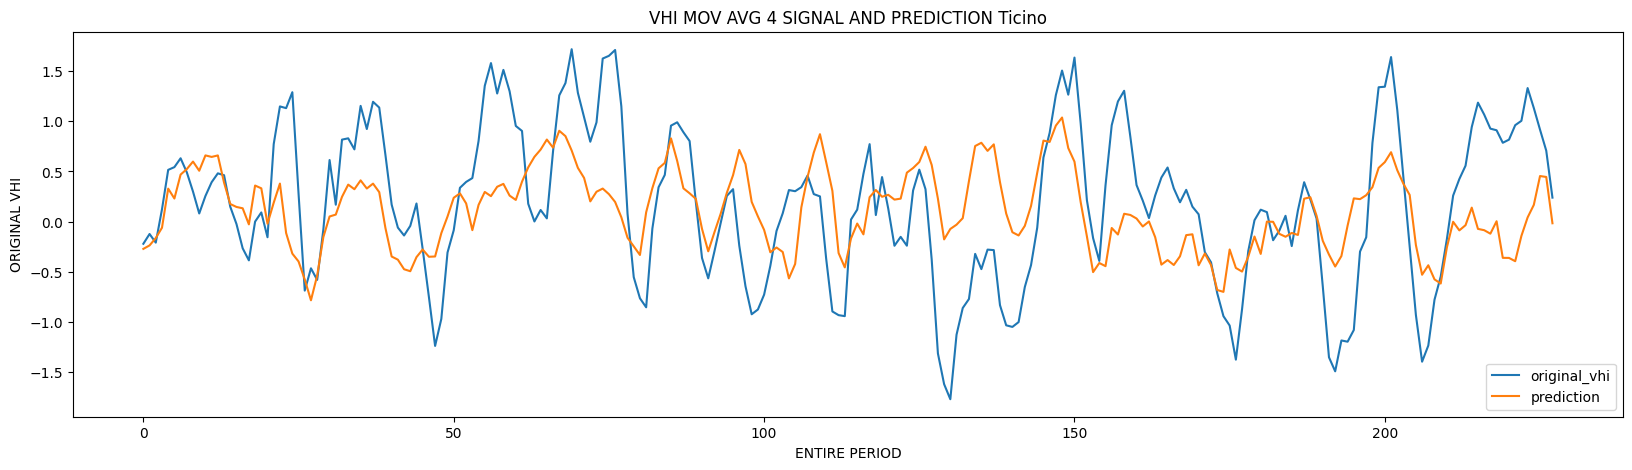

In [ ]:
target = targets_df_test[basin].values

plt.plot(target, label = "original_vhi")
plt.plot(lin_regr.predict(X_test_CMI5), label = "prediction")

plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel('ENTIRE PERIOD')
plt.ylabel('ORIGINAL VHI')
plt.title("VHI MOV AVG 4 SIGNAL AND PREDICTION " + basin)

plt.legend(loc="lower right")

## VHI signal

In [ ]:
path_target = "./csv/"
basin = "Oglio_Iseo"
target_df = pd.read_csv(path_target+basin+'.csv')
target_df = target_df.rename({'Unnamed: 0':'date'},axis=1)
target_df = target_df.loc[target_df['date']<='2020-01-01',:].copy()
target_df['moving_mean_2w'] = target_df['mean'].rolling(window = 2, min_periods = 0).mean()
target_df['moving_mean_4w'] = target_df['mean'].rolling(window = 4, min_periods = 0).mean()
target_df

,date,mean,median,year,week
0,2001-01-05,0.243674,0.26,2001,1
1,2001-01-13,0.424116,0.44,2001,2
2,2001-01-21,0.393786,0.39,2001,3
3,2001-01-29,0.314939,0.31,2001,5
4,2001-02-06,0.464902,0.48,2001,6
...,...,...,...,...,...
862,2019-11-23,0.640075,0.69,2019,47
863,2019-12-01,0.440248,0.44,2019,48
864,2019-12-09,0.354495,0.37,2019,50
865,2019-12-17,0.485338,0.51,2019,51


In [ ]:
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
targets_df = pd.DataFrame()

for basin in basins: 
  target_df = pd.read_csv(path_target+basin+'.csv')
  target_df = target_df.rename({'Unnamed: 0':'date'},axis=1)
  target_df = target_df.loc[target_df['date']<='2020-01-01',:].copy()
  targets_df[basin + '_mean'] = target_df['mean']
  targets_df[basin + '_moving_mean_2w'] = target_df['mean'].rolling(window = 2, min_periods = 0).mean()
  targets_df[basin + '_moving_mean_4w'] = target_df['mean'].rolling(window = 4, min_periods = 0).mean()

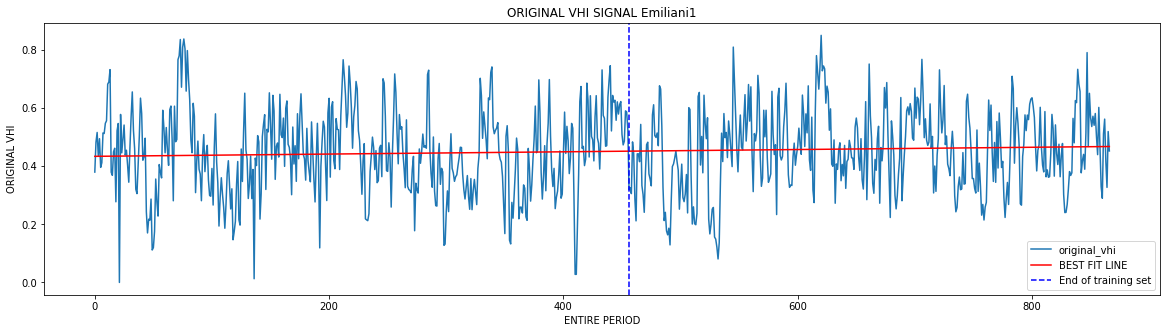

In [ ]:
target = target_df['mean'].values
X = target_df.index.values
X = X.reshape(X.shape[0], 1)
regression = LinearRegression()
regression.fit(X, target)

best_fit = regression.intercept_ + regression.coef_[0] * X

plt.plot(target, label = "original_vhi")
plt.plot(best_fit, label ="BEST FIT LINE", color='red')
plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel('ENTIRE PERIOD')
plt.ylabel('ORIGINAL VHI')
plt.title("ORIGINAL VHI SIGNAL " + basin)
plt.axvline(x=456, color='b', linestyle='--', label='End of training set')

plt.legend(loc="lower right")

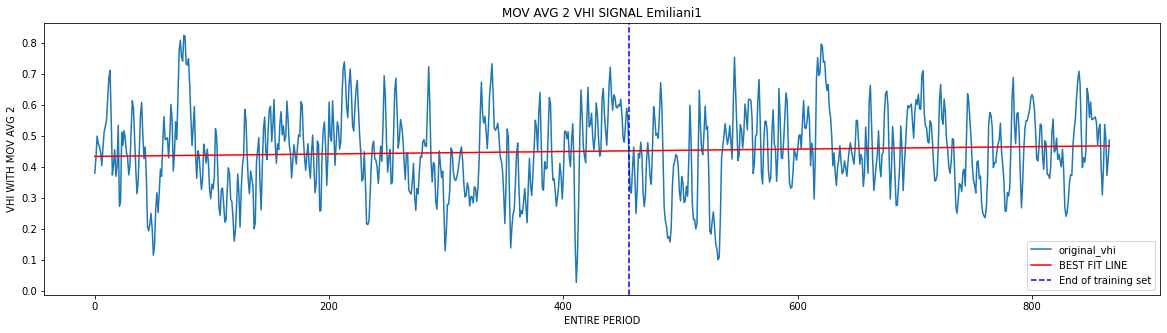

In [ ]:
target = target_df['moving_mean_2w'].values
X = target_df.index.values
X = X.reshape(X.shape[0], 1)
regression = LinearRegression()
regression.fit(X, target)

best_fit = regression.intercept_ + regression.coef_[0] * X

plt.plot(target, label = "original_vhi")
plt.plot(best_fit, label ="BEST FIT LINE", color='red')
plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel('ENTIRE PERIOD')
plt.ylabel('VHI WITH MOV AVG 2')
plt.title("MOV AVG 2 VHI SIGNAL " + basin)
plt.axvline(x=456, color='b', linestyle='--', label='End of training set')

plt.legend(loc="lower right")

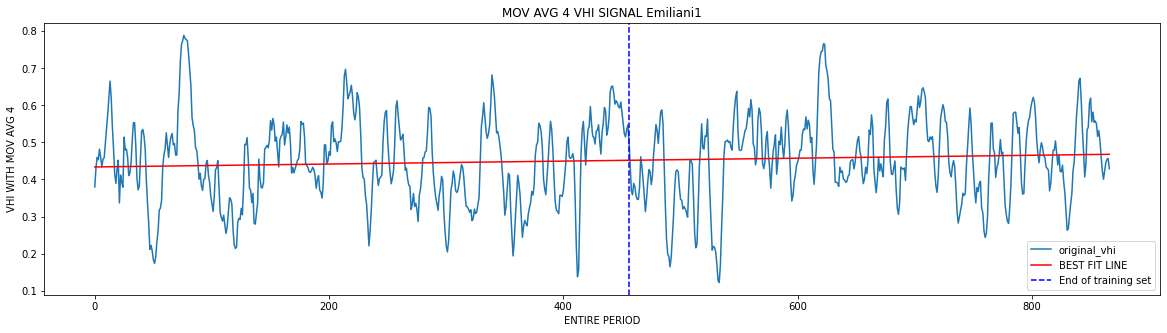

In [ ]:
target = target_df['moving_mean_4w'].values
X = target_df.index.values
X = X.reshape(X.shape[0], 1)
regression = LinearRegression()
regression.fit(X, target)

best_fit = regression.intercept_ + regression.coef_[0] * X

plt.plot(target, label = "original_vhi")
plt.plot(best_fit, label ="BEST FIT LINE", color='red')
plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel('ENTIRE PERIOD')
plt.ylabel('VHI WITH MOV AVG 4')
plt.title("MOV AVG 4 VHI SIGNAL " + basin)
plt.axvline(x=456, color='b', linestyle='--', label='End of training set')

plt.legend(loc="lower right")

## Binary VHI signal

In [ ]:
def check_no_peaks(row, df):
  
    global prev_val

    if row.name == 0 :
      prev_val = row['mean']

    next_val = df.loc[row.name + 1, 'mean'] if row.name < len(df) - 1 else row['mean']

    if (prev_val is None or next_val is None) or ((prev_val == 0 or next_val == 0) and row['mean'] == 0) or ((prev_val == 1 or next_val == 1) and row['mean'] == 1):
        res = row['mean']
    else :
        res = 1 - row['mean']
    
    prev_val = res
    return res

In [ ]:
basin = 'Emiliani2'
classnames = ['Bad', 'Good']
csv_target = "./csv/" + basin + ".csv"
from datetime import datetime

START_DATE = datetime.strptime('2001-01-05', '%Y-%m-%d')
END_DATE = datetime.strptime('2019-12-31', '%Y-%m-%d')
target = pd.read_csv(csv_target).rename(columns={'Unnamed: 0': 'date'})
target['date'] = pd.to_datetime(target['date'],format = '%Y-%m-%d')

# remove dates not available in features
target = target[target['date'] <= END_DATE]

In [ ]:
y_div = 0.5
target['mean'] = target['mean'].apply(lambda x: 1 if x > y_div else 0)
target['mean_nopeaks'] = target.apply(lambda x: check_no_peaks(x, target), axis=1)

In [ ]:
TRAIN_END_DATE = datetime.strptime('2009-12-31', '%Y-%m-%d')
VALID_END_DATE = datetime.strptime('2014-12-31', '%Y-%m-%d')
TEST_END_DATE = datetime.strptime('2019-12-31', '%Y-%m-%d')

target_train = target[target['date'] <= TRAIN_END_DATE]
target_validation = target[(target['date'] > TRAIN_END_DATE) & (target['date'] <= VALID_END_DATE)]
target_test = target[(target['date'] > VALID_END_DATE) & (target['date'] <= TEST_END_DATE)]

In [ ]:
target_train = target_train['mean_nopeaks'].to_frame()
target_validation = target_validation['mean_nopeaks'].to_frame()
target_test = target_test['mean_nopeaks'].to_frame()

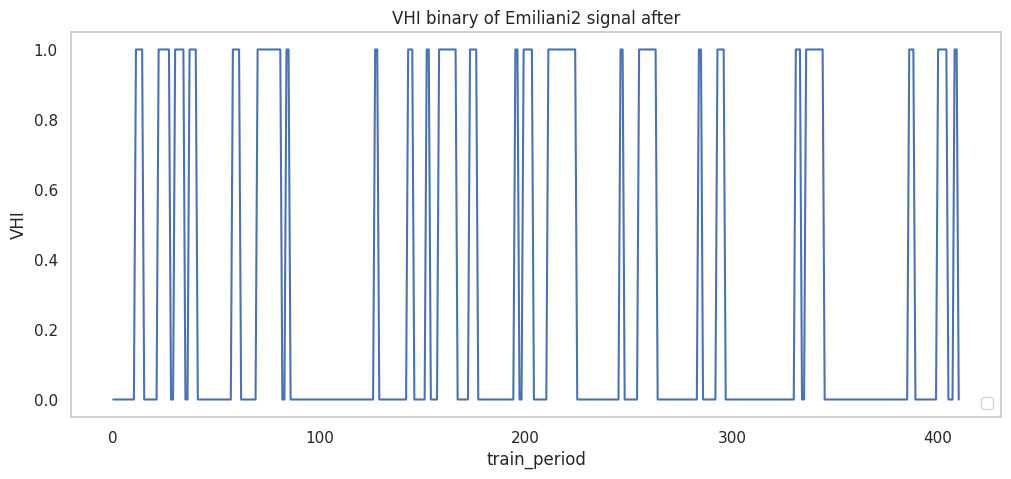

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 5)})
sns.set_style("whitegrid", {'axes.grid' : False})

y_div = target_train['mean_nopeaks'].quantile(0.5)
# y_div = 0.4

plt.ylabel("VHI")
plt.xlabel("train_period")
plt.title("VHI binary of Emiliani2 signal after")

plt.legend(loc="lower right")
plt.plot(target_train['mean_nopeaks'])

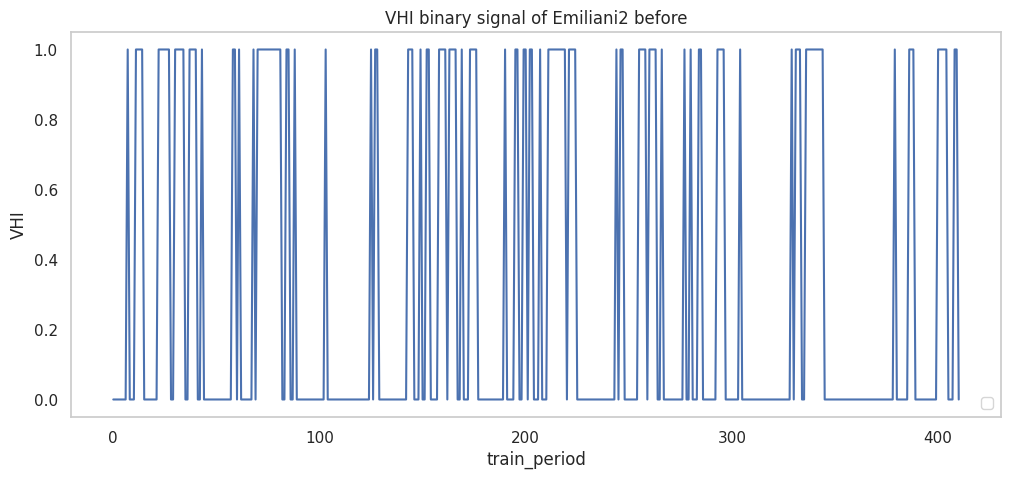

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 5)})
sns.set_style("whitegrid", {'axes.grid' : False})

y_div = target_train['mean'].quantile(0.5)
# y_div = 0.4

plt.ylabel("VHI")
plt.xlabel("train_period")
plt.title("VHI binary signal of Emiliani2 before")

plt.legend(loc="lower right")
plt.plot(target_train['mean'])

## Correlation matrices

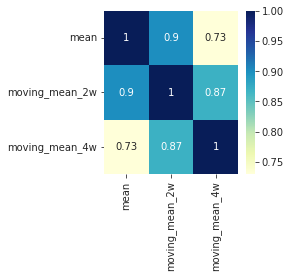

In [ ]:
import seaborn as sns
cormat = target_df.corr()
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(round(cormat,2), annot=True, ax=ax, cmap="YlGnBu")

ax.set_facecolor('white')
sns.set_style('ticks')

In [ ]:
# cluster Emiliani1-Emiliani2-Garda_Mincio
cluster_df = targets_df.filter(regex='Emiliani|Garda')

In [ ]:
cluster_df

,Emiliani1_mean,Emiliani2_mean,Garda_Mincio_mean
0,0.379890,0.214281,0.102270
1,0.482679,0.484737,0.454431
2,0.516259,0.466071,0.323514
3,0.434421,0.417470,0.301661
4,0.494805,0.492202,0.394733
...,...,...,...
862,0.562210,0.707366,0.707366
863,0.416967,0.478972,0.478972
864,0.327186,0.369868,0.369868
865,0.519451,0.496676,0.496676


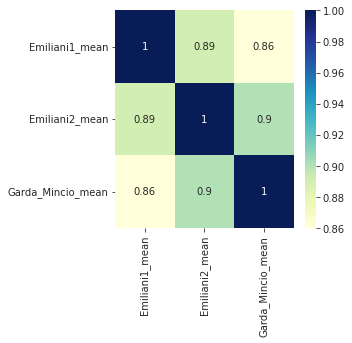

In [ ]:
cormat = cluster_df.iloc[:, 0::3].corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(round(cormat,2), annot=True, ax=ax, cmap="YlGnBu")

ax.set_facecolor('white')
sns.set_style('ticks')

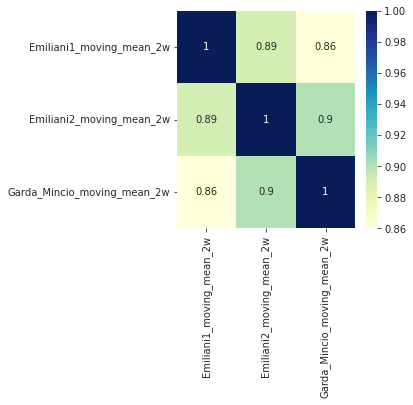

In [ ]:
cormat = cluster_df.iloc[:, 1::3].corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(round(cormat,2), annot=True, ax=ax, cmap="YlGnBu")

ax.set_facecolor('white')
sns.set_style('ticks')

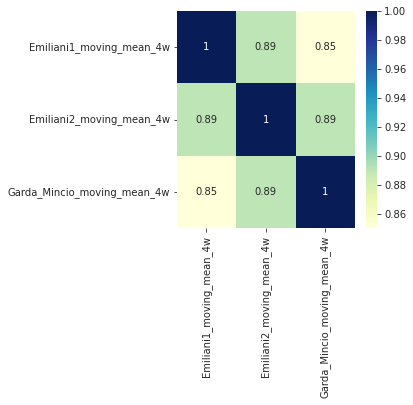

In [ ]:
cormat = cluster_df.iloc[:, 2::3].corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(round(cormat,2), annot=True, ax=ax, cmap="YlGnBu")

ax.set_facecolor('white')
sns.set_style('ticks')

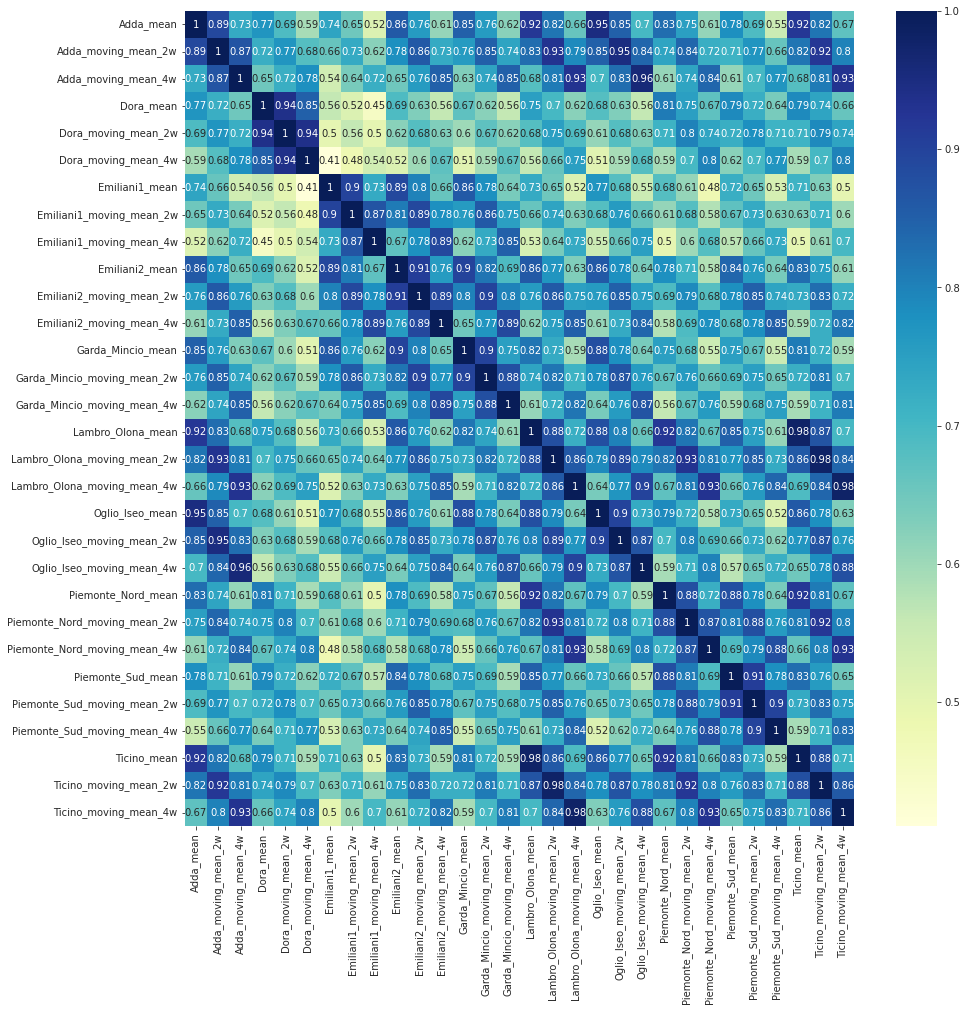

In [ ]:
cormat = targets_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(round(cormat,2), annot=True, ax=ax, cmap="YlGnBu")

ax.set_facecolor('white')
sns.set_style('ticks')

## VHI signal - valid vs test years

In [7]:
path_target = "./csv/"
basin = "Emiliani1"
target_df = pd.read_csv(path_target+basin+'.csv')
target_df = target_df.rename({'Unnamed: 0':'date'},axis=1)
target_df_train = target_df.loc[target_df['date']<'2010-01-06',:].copy()
target_df_val = target_df.loc[(target_df['date']>='2010-01-06') & (target_df['date']<'2015-01-04'),:].copy()
target_df_test = target_df.loc[(target_df['date']>='2015-01-04') & (target_df['date']<='2020-01-01'),:].copy()
target_df_train_val = pd.concat([target_df_train, target_df_val])
target_df

,date,mean,median,year,week
0,2001-01-05,0.379890,0.50,2001,1
1,2001-01-13,0.482679,0.58,2001,2
2,2001-01-21,0.516259,0.59,2001,3
3,2001-01-29,0.434421,0.50,2001,5
4,2001-02-06,0.494805,0.54,2001,6
...,...,...,...,...,...
983,2022-07-18,0.192801,0.17,2022,29
984,2022-07-26,0.134511,0.11,2022,30
985,2022-08-03,0.195684,0.17,2022,31
986,2022-08-11,0.166383,0.13,2022,32


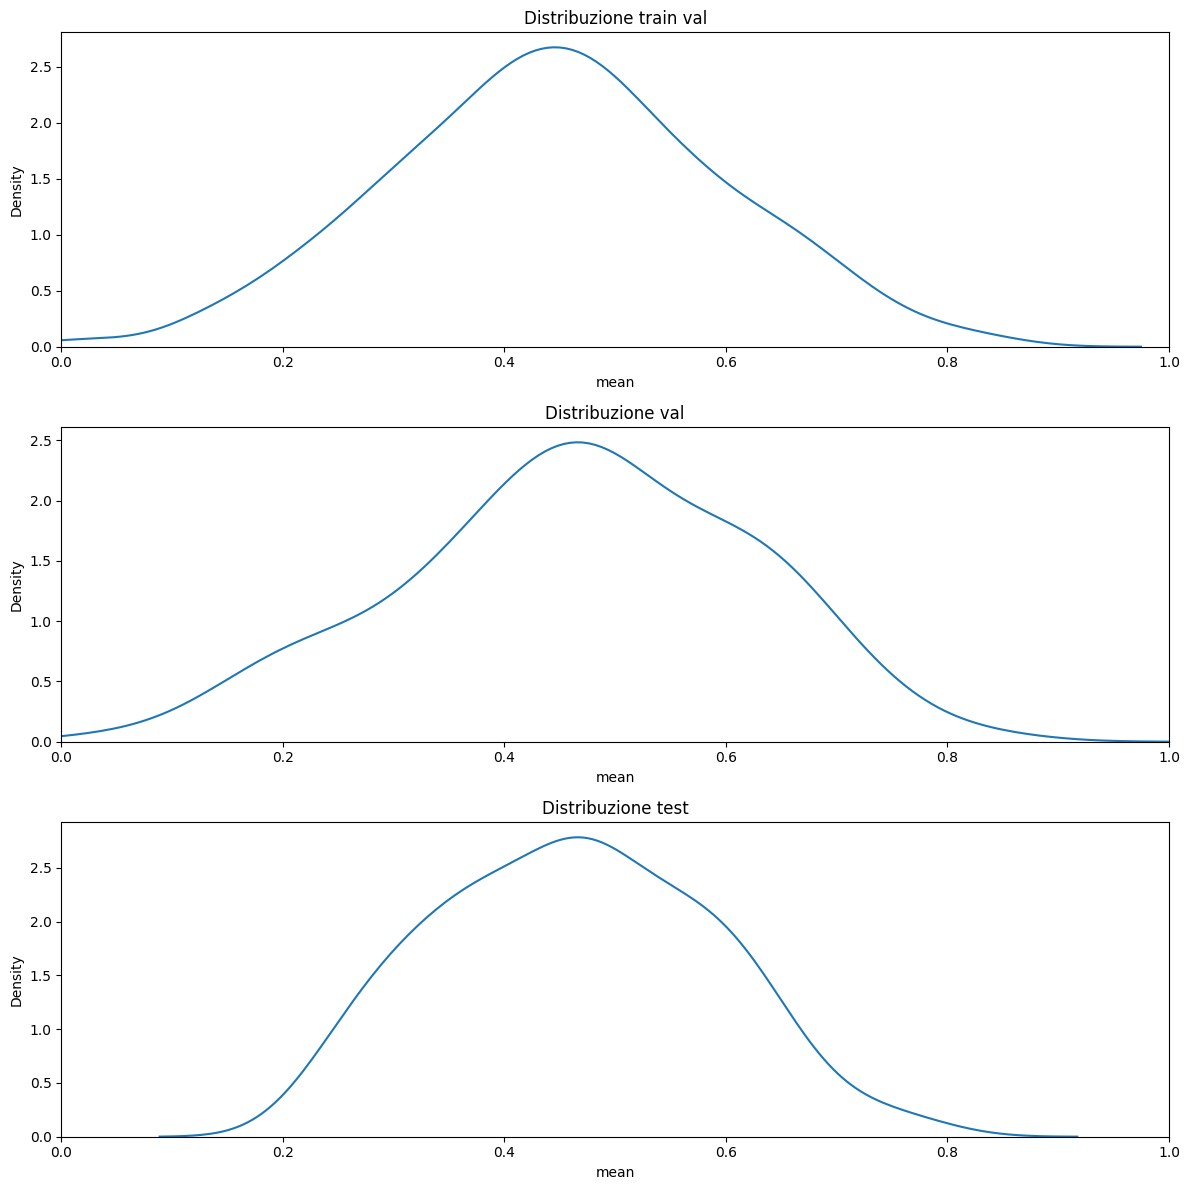

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

x_ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

sns.kdeplot(data=pd.concat([target_df_train, target_df_val]), x = 'mean', ax=axes[0])
axes[0].set_title("Distribuzione train val")
axes[0].set_xticks(x_ticks)

sns.kdeplot(data=target_df_val, x="mean", ax=axes[1])
axes[1].set_title("Distribuzione val")
axes[1].set_xticks(x_ticks)

sns.kdeplot(data=target_df_test, x = "mean", ax=axes[2])
axes[2].set_title("Distribuzione test")
axes[2].set_xticks(x_ticks)

x_min = 0.0
x_max = 1.0

for ax in axes:
    ax.set_xlim(x_min, x_max)

plt.tight_layout()

plt.show()

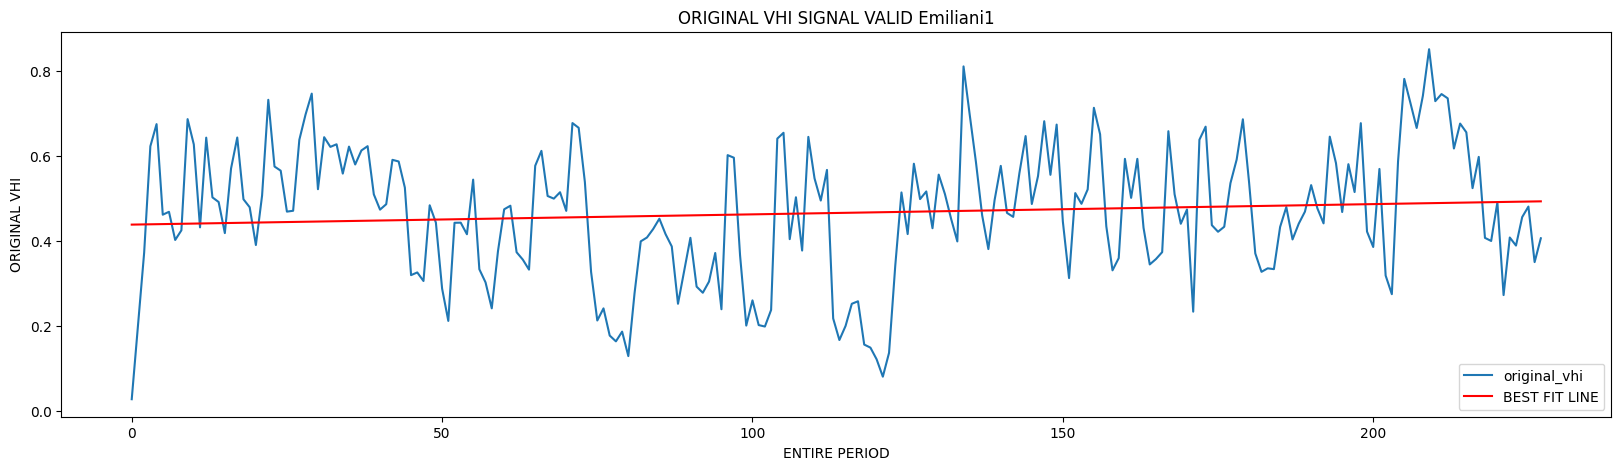

In [ ]:
target = target_df_val['mean'].values
X = target_df_val.index.values
X = X.reshape(X.shape[0], 1)
regression = LinearRegression()
regression.fit(X, target)

best_fit = regression.intercept_ + regression.coef_[0] * X

plt.plot(target, label = "original_vhi")
plt.plot(best_fit, label ="BEST FIT LINE", color='red')
plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel('ENTIRE PERIOD')
plt.ylabel('ORIGINAL VHI')
plt.title("ORIGINAL VHI SIGNAL VALID " + basin)
#plt.axvline(x=456, color='b', linestyle='--', label='End of training set')

plt.legend(loc="lower right")

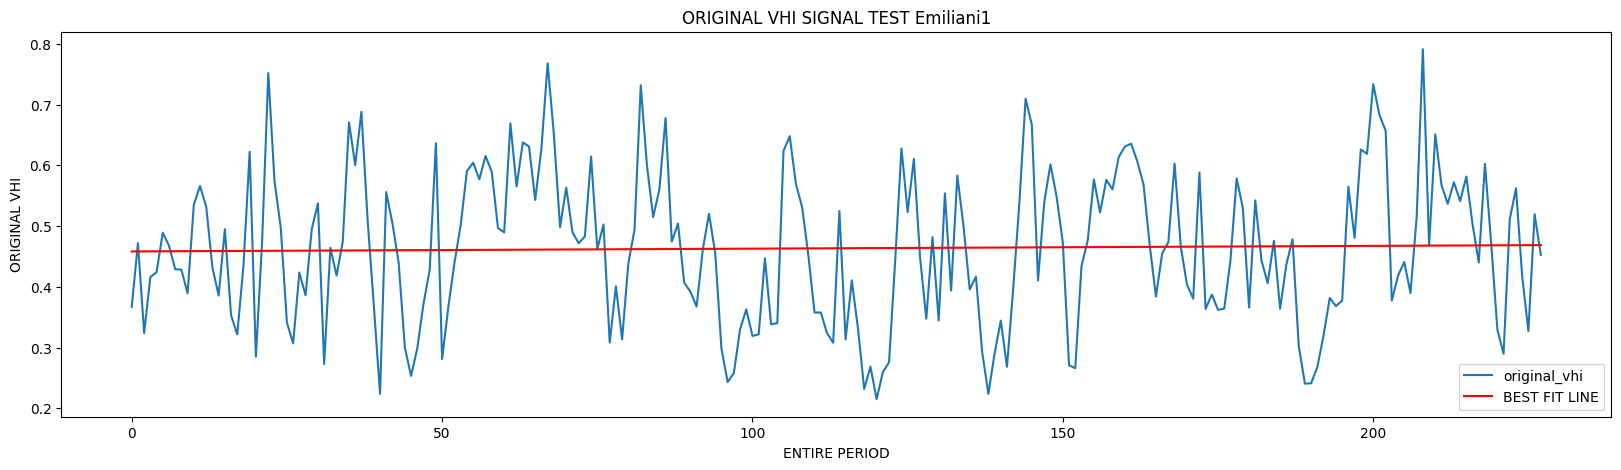

In [ ]:
target = target_df_test['mean'].values
X = target_df_val.index.values
X = X.reshape(X.shape[0], 1)
regression = LinearRegression()
regression.fit(X, target)

best_fit = regression.intercept_ + regression.coef_[0] * X

plt.plot(target, label = "original_vhi")
plt.plot(best_fit, label ="BEST FIT LINE", color='red')
plt.rcParams["figure.figsize"] = (20,5)

plt.xlabel('ENTIRE PERIOD')
plt.ylabel('ORIGINAL VHI')
plt.title("ORIGINAL VHI SIGNAL TEST " + basin)

plt.legend(loc="lower right")

### Confronto statistico tra time series

In [28]:
import statsmodels.api as sm

signal1 = target_df_val['mean'].values
signal2 = target_df_test['mean'].values
signal3 = pd.concat([target_df_train['mean'], target_df_val['mean']]).values
x = target_df_val.index.values
x3 = pd.concat([target_df_train['mean'], target_df_val['mean']]).index.values

df = pd.DataFrame({'Signal1': signal1, 'Signal2': signal2})

# Confronto tramite ARIMA
model_arima_y1 = sm.tsa.ARIMA(df['Signal1'], order=(2, 0, 1)).fit()
model_arima_y2 = sm.tsa.ARIMA(df['Signal2'], order=(1, 0, 1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [24]:
correlation = np.corrcoef(signal1, signal2)[0, 1]
correlation

0.28410268103920905

In [29]:
# Confronto tramite regressione lineare
regression_model_y1 = LinearRegression()
regression_model_y1.fit(x.reshape(-1, 1), signal1.reshape(-1, 1))

regression_model_y2 = LinearRegression()
regression_model_y2.fit(x.reshape(-1, 1), signal2.reshape(-1, 1))

regression_model_y3 = LinearRegression()
regression_model_y3.fit(x3.reshape(-1, 1), signal3.reshape(-1, 1))

LinearRegression()

In [31]:
# Stampa i coefficienti delle regressioni
print("Coefficienti della regressione per y1:")
print(regression_model_y1.coef_[0])
print("Coefficiente di intercetta per y1:")
print(regression_model_y1.intercept_)

print("\nCoefficienti della regressione per y2:")
print(regression_model_y2.coef_[0])
print("Coefficiente di intercetta per y2:")
print(regression_model_y2.intercept_)

print("\nCoefficienti della regressione per y3:")
print(regression_model_y3.coef_[0])
print("Coefficiente di intercetta per y3:")
print(regression_model_y3.intercept_)

Coefficienti della regressione per y1:
[0.00024093]
Coefficiente di intercetta per y1:
[0.33923551]

Coefficienti della regressione per y2:
[4.59016373e-05]
Coefficiente di intercetta per y2:
[0.43934004]

Coefficienti della regressione per y3:
[3.86524615e-05]
Coefficiente di intercetta per y3:
[0.43419207]


In [ ]:
# Stampa i risultati dei modelli
print("Risultati ARIMA per signal 1:")
print(model_arima_y1.summary())
print("\nRisultati ARIMA per signal 2:")
print(model_arima_y2.summary())

Risultati ARIMA per signal 1:
                               SARIMAX Results                                
Dep. Variable:                Signal1   No. Observations:                  228
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 162.021
Date:                Tue, 23 May 2023   AIC                           -318.042
Time:                        13:09:22   BIC                           -307.754
Sample:                             0   HQIC                          -313.891
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4615      0.023     20.510      0.000       0.417       0.506
ar.L1          0.6565      0.052     12.647      0.000       0.555       0.758
sigma2         0.0141 

In [10]:
# Granger test per valid vs test signals
from statsmodels.tsa.stattools import grangercausalitytests

result = grangercausalitytests(df, maxlag=3)

print("Risultati del test di Granger:")
for lag, lag_result in result.items():
    print(f"Lag {lag}:")
    print("Test statistic:", lag_result[0]['ssr_ftest'][0])
    print("p-value:", lag_result[0]['ssr_ftest'][1])
    crit_value = lag_result[0]['ssr_ftest'][2]
    print("Valore critico:", crit_value)
    print("----------------------")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5991  , p=0.4397  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=0.6071  , p=0.4359  , df=1
likelihood ratio test: chi2=0.6063  , p=0.4362  , df=1
parameter F test:         F=0.5991  , p=0.4397  , df_denom=224, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5295  , p=0.5896  , df_denom=221, df_num=2
ssr based chi2 test:   chi2=1.0830  , p=0.5819  , df=2
likelihood ratio test: chi2=1.0804  , p=0.5826  , df=2
parameter F test:         F=0.5295  , p=0.5896  , df_denom=221, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3920  , p=0.7589  , df_denom=218, df_num=3
ssr based chi2 test:   chi2=1.2138  , p=0.7497  , df=3
likelihood ratio test: chi2=1.2105  , p=0.7505  , df=3
parameter F test:         F=0.3920  , p=0.7589  , df_denom=218, df_num=3
Risultati del test di Granger:
Lag 1:
Test statistic: 0.5990935365901173
p-value: 0.4397402300

In [ ]:
# p-value deve essere < 0.05 o 0.01, qui 0.4 -> una serie non è utile per prevedere l'altra

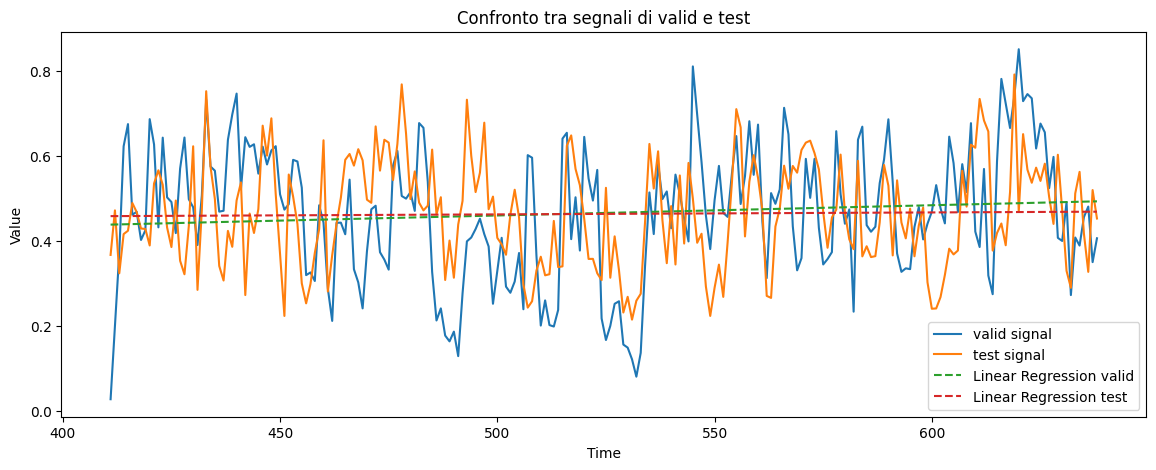

In [33]:
# Confronto grafico delle due serie temporali
plt.figure(figsize=(14, 5))
plt.plot(x, signal1, label='valid signal')
plt.plot(x, signal2, label='test signal')

plt.plot(x, regression_model_y1.predict(x.reshape(-1, 1)), linestyle='dashed', label='Linear Regression valid')
plt.plot(x, regression_model_y2.predict(x.reshape(-1, 1)), linestyle='dashed', label='Linear Regression test')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Confronto tra segnali di valid e test')
plt.show()

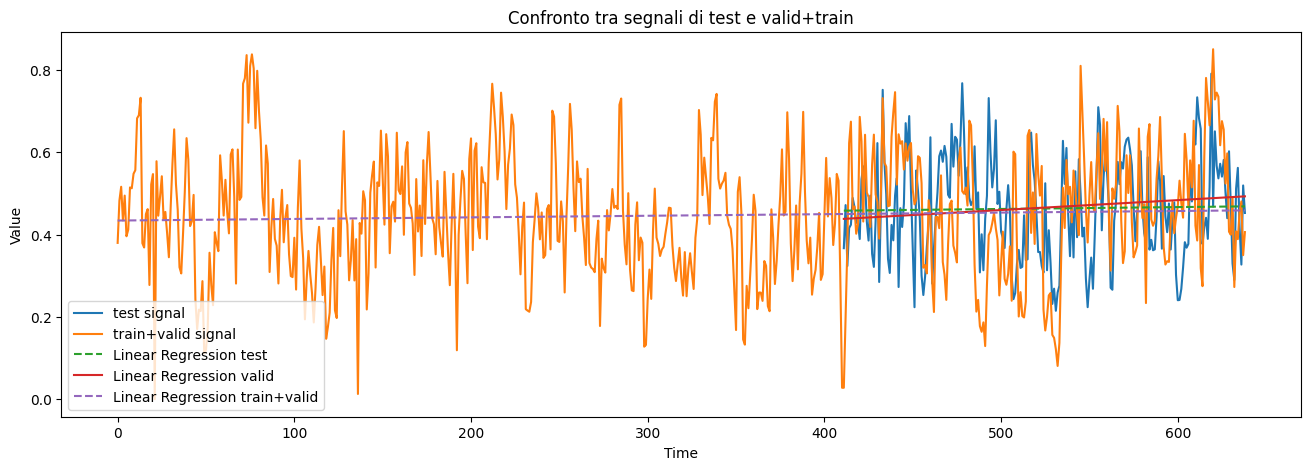

In [36]:
# Confronto grafico delle due serie temporali
plt.figure(figsize=(16, 5))
plt.plot(x, signal2, label='test signal')
plt.plot(x3, signal3, label='train+valid signal')

plt.plot(x, regression_model_y2.predict(x.reshape(-1, 1)), linestyle='dashed', label='Linear Regression test')
plt.plot(x, regression_model_y1.predict(x.reshape(-1, 1)), label='Linear Regression valid')
plt.plot(x3, regression_model_y3.predict(x3.reshape(-1, 1)), linestyle='dashed', label='Linear Regression train+valid')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Confronto tra segnali di test e valid+train')
plt.show()